In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle

import sys
import os
sys.path.append(os.path.relpath('../'))
from multi_condensed import Problem

In [ ]:
############################################ SETTING UP VARIABLE ###############################################
# # Mini Bicylinder
# h = 1.001
# d = [0.5, 0.25]
# a = [0.5, 1.0]
# heaving = [1, 1]

# # Small Bicylinder
# h = 20.0
# d = [10.0, 5.0]
# a = [5.0, 10.0]
# heaving = [1, 1]

# # Big Bicylinder
# h = 25.0
# d = [15.0, 10.0]
# a = [10.0, 15.0]
# heaving = [1, 1]

# # Mini Tricylinder
# h = 2.001
# d = [1.0, 0.5, 0.25]
# a = [0.25, 0.5, 1.0]
# heaving =[1, 1, 1]

# # Small Tricylinder
# h = 20.0
# d = [15, 10, 5]
# a = [5, 10, 15]
# heaving =[1, 1, 1]

# # Big Tricylinder
# h = 25.0
# d = [20, 15, 10]
# a = [10, 15, 20]
# heaving =[1, 1, 1]

# Some bicylinder
h = 1.001
d = [0.5, 0.25]
a = [0.25, 0.5]
heaving = [1, 1]

m0 = 1.0
rho = 1023
####################################################

In [3]:
############################################## MEEM ############################################################
hydro_collector_real = []
hydro_collector_imag = []
hydro_nondim_real_diff = [np.nan]
hydro_nondim_imag_diff = [np.nan]
timing = []
loop_num = 0
terms = range(2, 31)  # X-axis (index of elements)
for i in terms:
    NMK = [i, i, i]
    start = time.perf_counter()
    prob = Problem(h, d, a, heaving, NMK, m0, rho)
    a0 = prob.a_matrix()
    b0 = prob.b_vector()
    x = prob.get_unknown_coeffs(a0, b0)
    am, dp = prob.hydro_coeffs(x, "nondimensional")
    hydro_collector_real.append(am)
    hydro_collector_imag.append(dp)
    end = time.perf_counter()
    timing.append(end - start)

    if loop_num != 0:
        hydro_nondim_real_diff.append((hydro_collector_real[loop_num]-hydro_collector_real[loop_num-1])/hydro_collector_real[loop_num-1])
        hydro_nondim_imag_diff.append((hydro_collector_imag[loop_num]-hydro_collector_imag[loop_num-1])/hydro_collector_imag[loop_num-1])
    # if loop_num != 0:
    #     percent_diff_real = abs((186621534261.50247 - hydro_collector_real[loop_num-1])/186621534261.50247)
    #     percent_diff_imag = abs((3529258.9182286593 - hydro_collector_imag[loop_num-1])/3529258.9182286593)
    #     if percent_diff_real <= 0.001 and percent_diff_imag <= 0.001:
    #         break
    #     if times_MEEM[-1] > 11.94:
    #         break
    
    loop_num += 1

/Users/Bimali/Desktop/SEALab/semi-analytical-hydro/src/python/convergence study/../multi_condensed.py:551: LinAlgWarning: Ill-conditioned matrix (rcond=9.53398e-17): result may not be accurate.
  return linalg.solve(a,b)


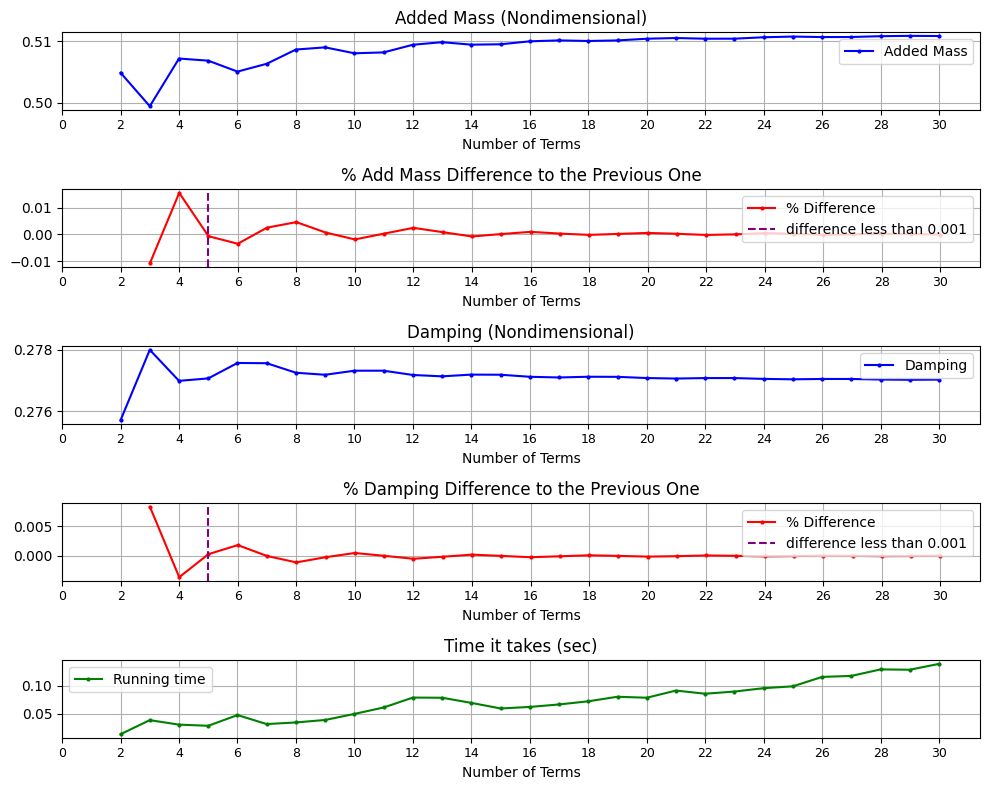

In [4]:
###graphing time, difference, and added mass###
ticks = np.arange(0, 31, 2)
# Create the plots
plt.figure(figsize=(10, 8))

# Plot real parts
plt.subplot(5, 1, 1)  # 1 row, 2 columns, first plot
plt.plot(range(terms[0], terms[0]+loop_num), hydro_collector_real, 'bo-', markersize=2, label='Added Mass')
plt.xlabel('Number of Terms')
plt.xticks(ticks, fontsize=9)
# plt.ylabel('Added Mass (Nondimensional)')
plt.title('Added Mass (Nondimensional)')
# plt.axhline(y=0.57774782, color='purple', linestyle='--', label='Capytaine Value')
plt.legend()
plt.grid(True)

# Plot the difference
# returns the index of the first value difference < 0.001, or None if there isn’t one
idx = next((i for i, v in enumerate(hydro_nondim_real_diff) if np.abs(v) < 0.001), None)
plt.subplot(5, 1, 2)  # 1 row, 2 columns, second plot
plt.plot(range(terms[0], terms[0]+loop_num), hydro_nondim_real_diff, 'ro-', markersize=2, label='% Difference')
plt.axvline(x=terms[idx],color='purple', linestyle='--', label='difference less than 0.001')
plt.xlabel('Number of Terms')
plt.xticks(ticks, fontsize=9)
# plt.ylabel('%Difference')
plt.title('% Add Mass Difference to the Previous One')
plt.legend(loc='upper right')
plt.grid(True)

# Plot imag parts
plt.subplot(5, 1, 3)  # 1 row, 2 columns, first plot
plt.plot(range(terms[0], terms[0]+loop_num), hydro_collector_imag, 'bo-', markersize=2, label='Damping')
plt.xlabel('Number of Terms')
plt.xticks(ticks, fontsize=9)
# plt.ylabel('Added Mass (Nondimensional)')
plt.title('Damping (Nondimensional)')
# plt.axhline(y=0.19735159, color='purple', linestyle='--',label='Capytaine Value')
plt.legend()
plt.grid(True)

# Plot the difference
idx = next((i for i, v in enumerate(hydro_nondim_imag_diff) if np.abs(v) < 0.001), None)
plt.subplot(5, 1, 4)  # 1 row, 2 columns, second plot
plt.plot(range(terms[0], terms[0]+loop_num), hydro_nondim_imag_diff, 'ro-', markersize=2, label='% Difference')
plt.axvline(x=terms[idx],color='purple', linestyle='--', label='difference less than 0.001')
plt.xlabel('Number of Terms')
plt.xticks(ticks, fontsize=9)
# plt.ylabel('%Difference')
plt.title('% Damping Difference to the Previous One')
plt.legend(loc='upper right')
plt.grid(True)

# Plot running time
plt.subplot(5, 1, 5)  # 1 row, 2 columns, second plot
plt.plot(range(terms[0], terms[0]+loop_num), timing, 'go-', markersize=2, label='Running time')
plt.xlabel('Number of Terms')
plt.xticks(ticks, fontsize=9)
# plt.ylabel('Time it takes (sec)')
plt.title('Time it takes (sec)')
plt.legend()
plt.grid(True)




# Show the plots
plt.tight_layout()
plt.show()


In [5]:
####printing the hydro-coefficients and converting them into MATLAB format###
print(hydro_collector_real)
print(hydro_collector_imag)

matlab_list1 = "pyMEEM_mu_nondim = [" + " ".join(map(str, hydro_collector_real)) + "];"
matlab_list2 = "pyMEEM_lambda_nondim = [" + " ".join(map(str, hydro_collector_imag)) + "];"

# Print MATLAB format
print(matlab_list1)
print(matlab_list2)

[np.float64(0.5048487975656226), np.float64(0.4994196953219498), np.float64(0.5071541534504106), np.float64(0.5068076376567928), np.float64(0.5050358078627524), np.float64(0.5063034769412432), np.float64(0.5086174468194284), np.float64(0.5089672343443831), np.float64(0.5080065956645895), np.float64(0.5081513639233127), np.float64(0.5093917191416305), np.float64(0.509807678443169), np.float64(0.5094056753995247), np.float64(0.5094676261112178), np.float64(0.5099488697416557), np.float64(0.5101000999811246), np.float64(0.5100018896512211), np.float64(0.5100939395900582), np.float64(0.5103690055020488), np.float64(0.5104825243827926), np.float64(0.5103696700464131), np.float64(0.5103766563424532), np.float64(0.5106063534562001), np.float64(0.5107190928466055), np.float64(0.5106390023289887), np.float64(0.5106479713943807), np.float64(0.5107795113055134), np.float64(0.5108355153474284), np.float64(0.510808130385714)]
[np.float64(0.27571218284812515), np.float64(0.2780037326843269), np.floa

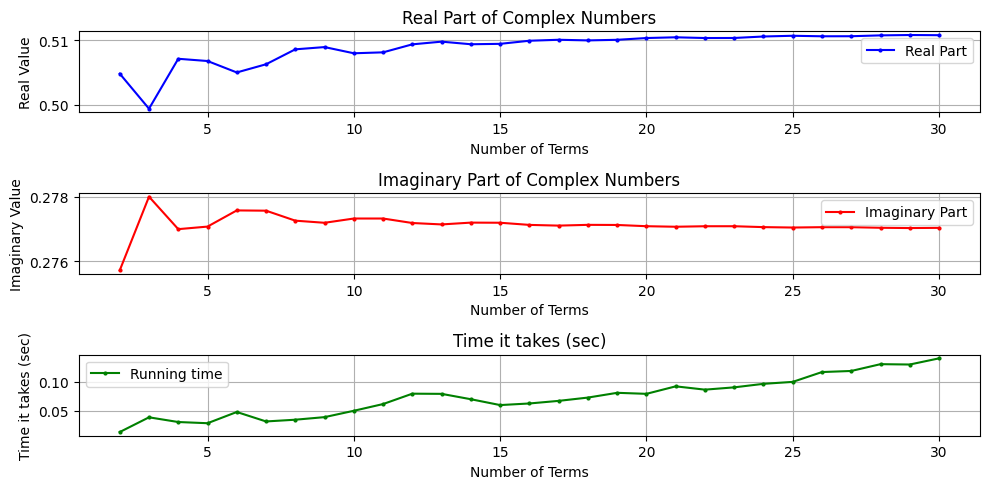

In [6]:
# Create the plots
plt.figure(figsize=(10, 5))

# Plot real parts
plt.subplot(3, 1, 1)  # 1 row, 2 columns, first plot
plt.plot(range(terms[0], terms[0]+loop_num), hydro_collector_real, 'bo-', markersize=2, label='Real Part')
plt.xlabel('Number of Terms')
plt.ylabel('Real Value')
plt.title('Real Part of Complex Numbers')
plt.legend()
plt.grid(True)

# Plot imaginary parts
plt.subplot(3, 1, 2)  # 1 row, 2 columns, second plot
plt.plot(range(terms[0], terms[0]+loop_num), hydro_collector_imag, 'ro-', markersize=2, label='Imaginary Part')
plt.xlabel('Number of Terms')
plt.ylabel('Imaginary Value')
plt.title('Imaginary Part of Complex Numbers')
plt.legend()
plt.grid(True)

# Plot running time
plt.subplot(3, 1, 3)  # 1 row, 2 columns, second plot
plt.plot(range(terms[0], terms[0]+loop_num), timing, 'go-', markersize=2, label='Running time')
plt.xlabel('Number of Terms')
plt.ylabel('Time it takes (sec)')
plt.title('Time it takes (sec)')
plt.legend()
plt.grid(True)



# Show the plots
plt.tight_layout()
plt.show()


In [7]:
# filepath = "term_convergence_data/"

# with open(filepath + "h50_convergence_data.pkl", "rb") as f:
#     real_h50, imag_h50, timing_h50 = pickle.load(f)

# with open(filepath + "h51_convergence_data.pkl", "rb") as f:
#     real_h51, imag_h51, timing_h51 = pickle.load(f)

# with open(filepath + "h52_convergence_data.pkl", "rb") as f:
#     real_h52, imag_h52, timing_h52 = pickle.load(f)

# with open(filepath + "h53_convergence_data.pkl", "rb") as f:
#     real_h53, imag_h53, timing_h53 = pickle.load(f)

# with open(filepath + "h54_convergence_data.pkl", "rb") as f:
#     real_h54, imag_h54, timing_h54 = pickle.load(f)

# with open(filepath + "h55_convergence_data.pkl", "rb") as f:
#     real_h55, imag_h55, timing_h55 = pickle.load(f)

# with open(filepath + "h56_convergence_data.pkl", "rb") as f:
#     real_h56, imag_h56, timing_h56 = pickle.load(f)

# with open(filepath + "h35_convergence_data.pkl", "rb") as f:
#     real_h35, imag_h35, timing_h35 = pickle.load(f)

# with open(filepath + "h65_convergence_data.pkl", "rb") as f:
#     real_h65, imag_h65, timing_h65 = pickle.load(f)

# with open(filepath + "h80_convergence_data.pkl", "rb") as f:
#     real_h80, imag_h80, timing_h80 = pickle.load(f)

# ## Alternative plotting needed.

# plt.scatter(timing_h50, real_h50, label='50')
# plt.scatter(timing_h51, real_h51, label='51')
# plt.scatter(timing_h52, real_h52, label='52')
# plt.scatter(timing_h53, real_h53, label='53')
# plt.scatter(timing_h54, real_h54, label='54')
# plt.scatter(timing_h55, real_h55, label='55')
# plt.scatter(timing_h56, real_h56, label='56')
# plt.scatter(timing_h35, real_h35, label='35')
# plt.scatter(timing_h65, real_h65, label='65')
# plt.scatter(timing_h80, real_h80, label='80')
# plt.axhline(y=186621534261.50247, color='r', linestyle='--')
# plt.xlabel('running time')
# plt.ylabel('hydro_real')
# plt.title('hydro_real, variable height')

# plt.legend()
# plt.show()

In [8]:
filepath = "term_convergence_data/"

with open(filepath + "h50_iii_conv_data.pkl", "rb") as f:
    real_h50_iii, imag_h50_iii, timing_h50_iii = pickle.load(f)

with open(filepath + "h50_i2ii_conv_data.pkl", "rb") as f:
    real_h50_i2ii, imag_h50_i2ii, timing_h50_i2ii = pickle.load(f)

with open(filepath + "h50_i3ii_conv_data.pkl", "rb") as f:
    real_h50_i3ii, imag_h50_i3ii, timing_h50_i3ii = pickle.load(f)

with open(filepath + "h50_i4ii_conv_data.pkl", "rb") as f:
    real_h50_i4ii, imag_h50_i4ii, timing_h50_i4ii = pickle.load(f)

with open(filepath + "h50_2i2ii_conv_data.pkl", "rb") as f:
    real_h50_2i2ii, imag_h50_2i2ii, timing_h50_2i2ii = pickle.load(f)

with open(filepath + "h50_2ii2i_conv_data.pkl", "rb") as f:
    real_h50_2ii2i, imag_h50_2ii2i, timing_h50_2ii2i = pickle.load(f)

with open(filepath + "h50_i2i2i_conv_data.pkl", "rb") as f:
    real_h50_i2i2i, imag_h50_i2i2i, timing_h50_i2i2i = pickle.load(f)

with open(filepath + "h50_i3i3i_conv_data.pkl", "rb") as f:
    real_h50_i3i3i, imag_h50_i3i3i, timing_h50_i3i3i = pickle.load(f)

with open(filepath + "h50_ii2i_conv_data.pkl", "rb") as f:
    real_h50_ii2i, imag_h50_ii2i, timing_h50_ii2i = pickle.load(f)

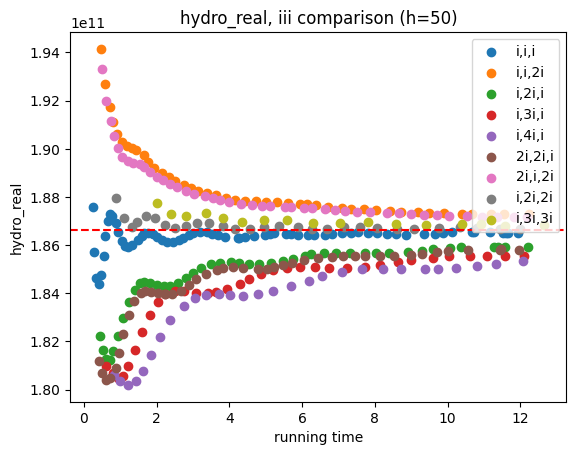

In [9]:
plt.scatter(timing_h50_iii, real_h50_iii, label='i,i,i')
plt.scatter(timing_h50_ii2i, real_h50_ii2i, label='i,i,2i')
plt.scatter(timing_h50_i2ii, real_h50_i2ii, label='i,2i,i')
plt.scatter(timing_h50_i3ii, real_h50_i3ii, label='i,3i,i')
plt.scatter(timing_h50_i4ii, real_h50_i4ii, label='i,4i,i')
plt.scatter(timing_h50_2i2ii, real_h50_2i2ii, label='2i,2i,i')
plt.scatter(timing_h50_2ii2i, real_h50_2ii2i, label='2i,i,2i')
plt.scatter(timing_h50_i2i2i, real_h50_i2i2i, label='i,2i,2i')
plt.scatter(timing_h50_i3i3i, real_h50_i3i3i, label='i,3i,3i')
plt.axhline(y=186621534261.50247, color='r', linestyle='--')
plt.xlabel('running time')
plt.ylabel('hydro_real')
plt.title('hydro_real, iii comparison (h=50)')

plt.legend()
plt.show()

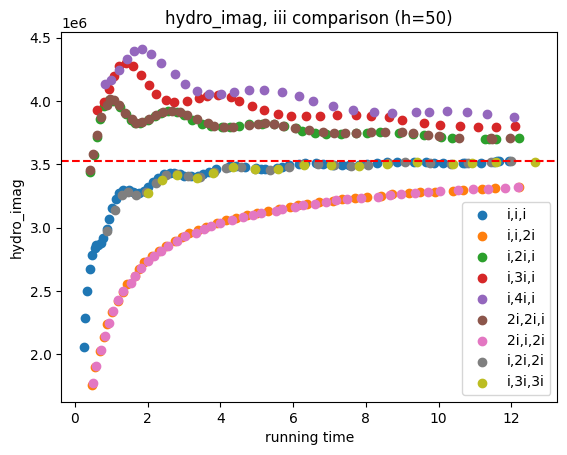

In [23]:
plt.scatter(timing_h50_iii, imag_h50_iii, label='i,i,i')
plt.scatter(timing_h50_ii2i, imag_h50_ii2i, label='i,i,2i')
plt.scatter(timing_h50_i2ii, imag_h50_i2ii, label='i,2i,i')
plt.scatter(timing_h50_i3ii, imag_h50_i3ii, label='i,3i,i')
plt.scatter(timing_h50_i4ii, imag_h50_i4ii, label='i,4i,i')
plt.scatter(timing_h50_2i2ii, imag_h50_2i2ii, label='2i,2i,i')
plt.scatter(timing_h50_2ii2i, imag_h50_2ii2i, label='2i,i,2i')
plt.scatter(timing_h50_i2i2i, imag_h50_i2i2i, label='i,2i,2i')
plt.scatter(timing_h50_i3i3i, imag_h50_i3i3i, label='i,3i,3i')
plt.axhline(y=3529258.9182286593, color='r', linestyle='--')

plt.xlabel('running time')
plt.ylabel('hydro_imag')
plt.title('hydro_imag, iii comparison (h=50)')

plt.legend()
plt.show()

In [ ]:
########YEUNG MULTIPLICATION HYDRO-COEFF CALCULATION#######
    # hydro_coef_1_1 = (4*(h-d[0])**2-a[0]**2)/(8*a[0]*(h-d[0]))+X[0]/a[0]
    # W_1 = np.zeros(NMK[0]+1, dtype=complex)
    # for n in range(1,NMK[0]):
    #     W_1[n] = X[n]*(-1)**n*besseli(1,lambda_ni(n, 0)*a[0])/(lambda_ni(n,0)*besseli(0,lambda_ni(n,0)*a[0]))
    # hydro_coef_1_2 = (2/a[0]**2)*sum(W_1)
    # hydro_coef_2_1 = (a[1]**2-a[0]**2)**2/(8*a[1]**3)/(h-d[1])*(4*(h-d[1])**2-(a[1]**2+a[0]**2))
    # hydro_coef_2_2 = X[NMK[0]]*(a[1]**2-a[0]**2)/(2*a[1]**3)
    # hydro_coef_2_3 = X[NMK[0]+NMK[1]]/(2*a[1]**3)*(a[1]**2*np.log(a[1])-a[0]**2*np.log(a[0])-(a[1]**2-a[0]**2)/2)
    # W_2 = np.zeros(NMK[1]+1, dtype=complex)
    # for m in range(1,NMK[1]):
    #     W_2[m] = (-1)**m/lambda_ni(m, 1)*(X[NMK[0]+m]*(a[1]*besseli(1,lambda_ni(m, 1)*a[1])/besseli(0,lambda_ni(m,1)*scale) -a[0]*besseli(1,lambda_ni(m,1)*a[0])/besseli(0,lambda_ni(m,1)*scale))
    #                                      -X[NMK[0]+NMK[1]+m]*(a[1]*besselk(1,lambda_ni(m, 1)*a[1])/besselk(0,lambda_ni(m,1)*scale) -a[0]*besselk(1,lambda_ni(m,1)*a[0])/besselk(0,lambda_ni(m,1)*scale)))
    # hydro_coef_2_4 = (2/a[1]**3)*sum(W_2)

    # hydro_coef = hydro_coef_1_1 + hydro_coef_1_2 + hydro_coef_2_1 + hydro_coef_2_2 + hydro_coef_2_3 + hydro_coef_2_4
    # hydro_coef_real = hydro_coef.real
    # hydro_coef_imag = hydro_coef.imag/omega

    ###############